In [1]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors # LogNorm
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, MFDataset
import pandas as pd
from scipy import spatial # KDTree search
from datetime import datetime
from datetime import timedelta
import glob # read BYU giant iceberg files
import gc
from IPython.display import clear_output # progressbar

In [2]:
cd ./PI

/SILIX3/MauroData/Forcing_fields/pyBerg/PI


In [23]:
ls

'1day_ECCO2_siarea_seaice_fractional_ice-covered_area_[m^2_m^2].nc'
'1day_ECCO2_ssh_sea_surface_height_[m].nc'
 1day_ERA5_1997_2019_u_windcomponent.nc
 1day_ERA5_1997_2019_v_windcomponent.nc
'3day_ECCO2_5m_salt_salinity_[psu]_5samples.nc'
'3day_ECCO2_5m_salt_salinity_[psu].nc'
'3day_ECCO2_5m_theta_potential_temperature_[deg_c]_5samples.nc'
'3day_ECCO2_5m_theta_potential_temperature_[deg_c].nc'
'3day_ECCO2_5m_uvel_zonal_velocity_[m_s]_5samples.nc'
'3day_ECCO2_5m_uvel_zonal_velocity_[m_s].nc'
'3day_ECCO2_5m_vvel_meridional_velocity_[m_s]_5samples.nc'
'3day_ECCO2_5m_vvel_meridional_velocity_[m_s].nc'
'3day_ECCO2_siarea_seaice_fractional_ice-covered_area_[m^2_m^2]_5samples.nc'
'3day_ECCO2_siarea_seaice_fractional_ice-covered_area_[m^2_m^2].nc'
'3day_ECCO2_ssh_sea_surface_height_[m]_5samples.nc'
'3day_ECCO2_ssh_sea_surface_height_[m].nc'
 3day_ERA5_1997_2019_u_windcomponent_5samples.nc
 3day_ERA5_1997_2019_u_windcomponent.nc
 3day_ERA5_1997_2019_v_windcomponent_5samples.nc
 3day_ERA5_1997_2

In [9]:
#EXP='PI'
gc.collect()

88

### Plot Field

In [10]:
def plot_field(plotfield, cbar_label='field', vmin=-2., vmax=2.):
    
    m = Basemap(projection='spstere',boundinglat=-34,lon_0=180,resolution='l')
    #m = Basemap(projection='robin',boundinglat=40,lon_0=0,resolution='l')
    m.drawcoastlines()

    # draw parallels and meridians.
    m.drawparallels(np.arange(-80.,81.,20.))
    m.drawmeridians(np.arange(-180.,181.,20.))

    # plot
    lon_map,lat_map=m(XX[:,:],YY[:,:])
    im=m.contourf(lon_map,lat_map, plotfield, vmin=vmin, vmax=vmax)

    # colorbar
    cbar=plt.colorbar()
    cbar.set_label(cbar_label)

    plt.show()

### Open and look at the forcing data

In [21]:
def loaddata(filen, variable, returncoords=False, threeD=False):
    
    # let's construct the file name
    pathtofile = "./"
    
    # the file to be loaded
    filename = pathtofile + filen
    
    print("loading " + filename + " ...") # Python3 needs brackets here
    
    # load the file
    fl = Dataset(filename)
    
    print('Variables: ', fl.variables.keys())
    
    if 'longitude' in fl.variables.keys():
        lon = 'longitude'
        lat = 'latitude'
            
    if 'lon' in fl.variables.keys():
        lon = 'lon'
        lat = 'lat'
        
    
    # lon lat on grid
    lon_start = np.asarray(fl.variables[lon])
    lat_start = np.asarray(fl.variables[lat])
    inputfield = np.asarray(fl.variables[variable])


    if threeD==True:
        depth=np.asarray(fl.variables['lev'])
    
    print('Inputfield shape: ', inputfield.shape)
    
    fl.close()
    gc.collect()
        
    if returncoords==True and threeD==False:
        XX, YY = np.meshgrid(lon_start,lat_start)
        return inputfield, XX, YY
    elif returncoords==True and threeD==True:
        XX, YY = np.meshgrid(lon_start,lat_start)
        return inputfield, XX, YY, depth
    else:
        return inputfield

### Forcing variables from reanalysis

loading ./3day_ERA5_1997_2019_u_windcomponent_5samples.nc ...
Variables:  dict_keys(['time', 'time_bnds', 'longitude', 'latitude', 'u10'])
Inputfield shape:  (5, 225, 1440)


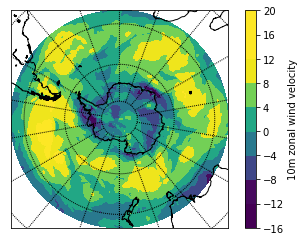

In [24]:
# load the variables and plot them
filen='3day_ERA5_1997_2019_u_windcomponent_5samples.nc' #'ERA5 wind components'
variable='u10'
cbar_label='10m zonal wind velocity'
vmin, vmax=-10.5, 10.5

# load the data
plotfield, XX, YY = loaddata(filen, variable, returncoords=True)
month=0
plotfield=plotfield[month,:,:]

# plot the field
plot_field(plotfield, cbar_label=cbar_label, vmin=vmin, vmax=vmax)

loading ./3day_ERA5_1997_2019_v_windcomponent_5samples.nc ...
Variables:  dict_keys(['time', 'time_bnds', 'longitude', 'latitude', 'v10'])
Inputfield shape:  (5, 225, 1440)


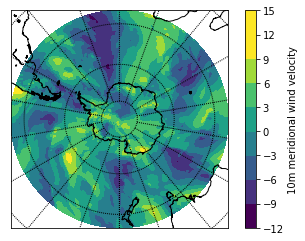

In [25]:
# load the variables and plot them
filen='3day_ERA5_1997_2019_v_windcomponent_5samples.nc' #'ERA5 wind components'
variable='v10'
cbar_label='10m meridional wind velocity'
vmin, vmax=-10.5, 10.5

# load the data
plotfield, XX, YY = loaddata(filen, variable, returncoords=True)

# set to nan; which month and level?
month=0
plotfield=plotfield[month,:,:]

# plot the field
plot_field(plotfield, cbar_label=cbar_label, vmin=vmin, vmax=vmax)

loading ./3day_ECCO2_5m_uvel_zonal_velocity_[m_s]_5samples.nc ...
Variables:  dict_keys(['time', 'lon', 'lat', 'lev', 'uvel'])
Inputfield shape:  (5, 1, 221, 1440)


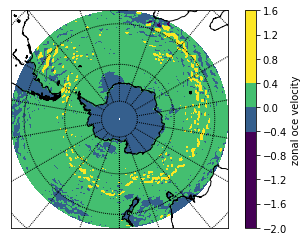

In [27]:
# load the variables and plot them
filen='3day_ECCO2_5m_uvel_zonal_velocity_[m_s]_5samples.nc'
#filen=EXP+'_mpiom_last100year_ocean_uv'
variable='uvel'
cbar_label='zonal oce velocity'
vmin, vmax=-.5, 0.5
    
# load the data
plotfield, XX, YY, depth = loaddata(filen, variable, returncoords=True, threeD=True)
plotfield[plotfield==-1.e+23]=np.nan


# set to nan; which month and level?
month=0
level=0 # 0:top, 49:Bottom
plotfield=plotfield[month,level,:,:]
plotfield[plotfield==-1.e+23]=np.nan

# plot the field
plot_field(plotfield, cbar_label=cbar_label, vmin=vmin, vmax=vmax)

loading ./3day_ECCO2_5m_vvel_meridional_velocity_[m_s]_5samples.nc ...
Variables:  dict_keys(['time', 'lon', 'lat', 'lev', 'vvel'])
Inputfield shape:  (5, 1, 221, 1440)


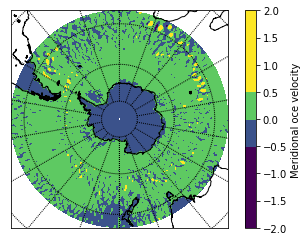

In [28]:
# load the variables and plot them
filen='3day_ECCO2_5m_vvel_meridional_velocity_[m_s]_5samples.nc'
#filen=EXP+'_mpiom_last100year_ocean_uv'
variable='vvel'
cbar_label='Meridional oce velocity'
vmin, vmax=-.5, 0.5
    
# load the data
plotfield, XX, YY = loaddata(filen, variable, returncoords=True)
plotfield[plotfield==-1.e+23]=np.nan

# set to nan; which month and level?
month=0
level=0 # 0:top, 49:Bottom
plotfield=plotfield[month,level,:,:]
plotfield[plotfield==-1.e+23]=np.nan

# plot the field
plot_field(plotfield, cbar_label=cbar_label, vmin=vmin, vmax=vmax)

loading ./3day_ECCO2_siarea_seaice_fractional_ice-covered_area_[m^2_m^2]_5samples.nc ...
Variables:  dict_keys(['time', 'time_bnds', 'lon', 'lat', 'siarea'])
Inputfield shape:  (5, 237, 1440)


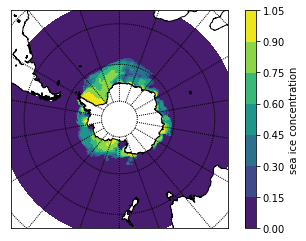

In [29]:
# load the variables and plot them
filen='3day_ECCO2_siarea_seaice_fractional_ice-covered_area_[m^2_m^2]_5samples.nc'
variable='siarea'
cbar_label='sea ice concentration'
vmin, vmax=0.,1. #00.

# load the data
plotfield, XX, YY = loaddata(filen, variable, returncoords=True)
plotfield[plotfield==-1.e+23]=np.nan
# set to nan; which month and level?
month=0
#level=0
plotfield=plotfield[month,:,:]

# plot the field
plot_field(plotfield, cbar_label=cbar_label, vmin=vmin, vmax=vmax)

loading ./3day_ECCO2_5m_salt_salinity_[psu]_5samples.nc ...
Variables:  dict_keys(['time', 'lon', 'lat', 'lev', 'salt'])
Inputfield shape:  (5, 1, 221, 1440)


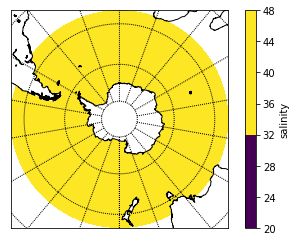

In [31]:
# load the variables and plot them
filen='3day_ECCO2_5m_salt_salinity_[psu]_5samples.nc'
variable='salt'
cbar_label='salinity'
vmin, vmax=30.,34.

# load the data
plotfield, XX, YY = loaddata(filen, variable, returncoords=True)
plotfield[plotfield==-1.e+23]=np.nan

# set to nan; which month and level?
month=0
level=0
plotfield=plotfield[month,level,:,:]

# plot the field
plot_field(plotfield, cbar_label=cbar_label, vmin=vmin, vmax=vmax)

loading ./3day_ECCO2_5m_theta_potential_temperature_[deg_c]_5samples.nc ...
Variables:  dict_keys(['time', 'lon', 'lat', 'lev', 'theta'])
Inputfield shape:  (5, 1, 221, 1440)


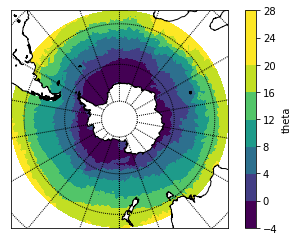

In [32]:
# load the variables and plot them
filen='3day_ECCO2_5m_theta_potential_temperature_[deg_c]_5samples.nc'
variable='theta'
cbar_label='theta' #'potential temperature'

#filen= 'ECCO2_sst_sea_surface_temperature_[deg_c].nc'
#variable='sst'
#cbar_label='sst' #'potential temperature'
vmin, vmax=-2.,20 #-2.,20.

# load the data
plotfield, XX, YY = loaddata(filen, variable, returncoords=True)
plotfield[plotfield==-1.e+23]=np.nan
# set to nan; which month and level?
month=0
level=0
plotfield=plotfield[month,0,:,:]
plotfield[plotfield==-1.e+23]=np.nan

# plot the field
plot_field(plotfield, cbar_label=cbar_label, vmin=vmin, vmax=vmax)

loading ./3day_ECCO2_ssh_sea_surface_height_[m]_5samples.nc ...
Variables:  dict_keys(['time', 'time_bnds', 'lon', 'lat', 'ssh'])
Inputfield shape:  (5, 237, 1440)


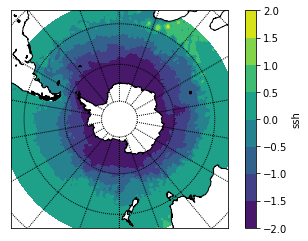

In [33]:
# load the variables and plot them
filen='3day_ECCO2_ssh_sea_surface_height_[m]_5samples.nc'
variable='ssh'
cbar_label='ssh'
vmin, vmax=-2.,2.

# load the data
SSH, XX, YY = loaddata(filen, variable, returncoords=True)
SSH[SSH==-1.e+23]=np.nan
# set to nan and which month?
month=0
#level=0
SSH[SSH==-1.e+23]=np.nan

# plot the field
plot_field(SSH[month,:,:], cbar_label=cbar_label, vmin=vmin, vmax=vmax)

In [34]:
def compute_gradient(SSH, XX, YY):
    
    rad=np.pi/180.0 # radiant <-> degree
    m, l, c = SSH.shape
    
    # add column to the left and right
    addcol=np.concatenate([np.expand_dims(SSH[:,:,-1],axis=2),SSH,np.expand_dims(SSH[:,:,0], axis=2)],axis=2)
    addcXX=np.concatenate([np.expand_dims(np.ones_like(XX[:,-1])*-1.,axis=1),XX,np.expand_dims(np.ones_like(XX[:,0])*360., axis=1)],axis=1)
    addcYY=np.concatenate([np.expand_dims(YY[:,-1],axis=1),YY,np.expand_dims(YY[:,0], axis=1)],axis=1)
    
    # SSH: (12, 180, 362) # already has columns added left and right
    lats=YY[:,0]
    ddx=np.zeros_like(SSH)
    ddy=np.zeros_like(SSH)
    
    # 1 ... 360 (0 and 361 were added)
    for column in np.arange(1,c+1): #360
        #print column
        ddx[:,:,column-1]=(addcol[:,:,column+1]-addcol[:,:,column-1])/(2.*111000.)
        
    for row in np.arange(1,l-1): #180-1
        #print row
        ddy[:,row,:]=(SSH[:,row+1,:]-SSH[:,row-1,:])/(2.*111000.*np.cos(YY[row,0]*rad))
        
    return ddx, ddy

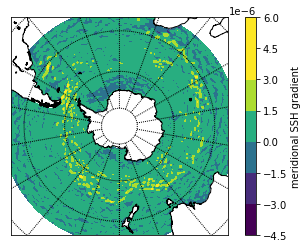

In [35]:
ddx, ddy = compute_gradient(SSH, XX, YY)

# which month and component?
cbar_label="meridional SSH gradient"
vmin=-3e-6
vmax=3e-6
month=0
plotfield=np.squeeze(ddy[month,:,:])

# plot the field
plot_field(plotfield, cbar_label=cbar_label, vmin=vmin, vmax=vmax)

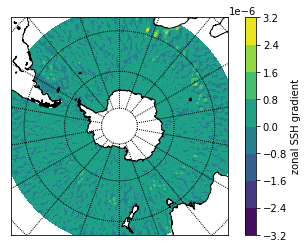

In [36]:
# get sea surface height slope

# which month and component?
cbar_label="zonal SSH gradient"
vmin=-3e-6
vmax=3e-6
month=0
plotfield=np.squeeze(ddx[month,:,:])

# plot the field
plot_field(plotfield, cbar_label=cbar_label, vmin=vmin, vmax=vmax)

loading ./Montly_opa0_ice_velocity_v_[m_s].nc ...
Variables:  dict_keys(['lon', 'lat', 'time', 'iicevelv'])
Inputfield shape:  (264, 56, 360)
9.96921e+36


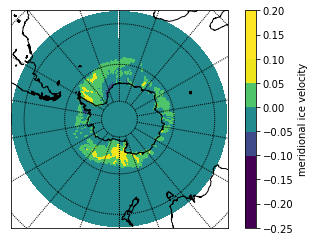

In [39]:
# load the variables and plot them; SICUO and SICVE
filen='Montly_opa0_ice_velocity_v_[m_s].nc'
variable='iicevelv'
cbar_label='meridional ice velocity'
vmin, vmax=-0.12,0.08

# load the data
plotfield, XX, YY = loaddata(filen, variable, returncoords=True)
print(plotfield.max())
# set to nan; which month and level?
month=0
plotfield[plotfield==9.96921e+36]=0.
plotfield=plotfield[month,:,:]

# plot the field
plot_field(plotfield, cbar_label=cbar_label, vmin=vmin, vmax=vmax)

loading ./Montly_opa0_ice_velocity_u_[m_s].nc ...
Variables:  dict_keys(['lon', 'lat', 'time', 'iicevelu'])
Inputfield shape:  (264, 56, 360)


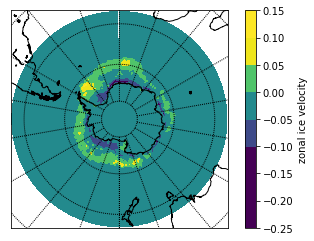

In [40]:
# load the variables and plot them; SICUO and SICVE
filen='Montly_opa0_ice_velocity_u_[m_s].nc'
variable='iicevelu'
cbar_label='zonal ice velocity'
vmin, vmax=-0.12,0.08

# load the data
plotfield, XX, YY = loaddata(filen, variable, returncoords=True)

# set to nan; which month and level?
month=0
plotfield[plotfield==9.96921e+36]=0.
plotfield=plotfield[month,:,:]

# plot the field
plot_field(plotfield, cbar_label=cbar_label, vmin=vmin, vmax=vmax)